### Import the necessary modules
Note: The provided modules list should only be viewed as a hint. Feel free to add/remove any module from the list.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier

### The dataset 
We are trying to predict if a person has a heart disease, based on health facctors provided in the dataset. So, the HeartDisease column is the label.
Load the dataset and display a few rows of it.

In [2]:
# Load the dataset and display a few rows
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Basic dataset inspection and preprocessing
Plot a countplot for the labels and a heatmap for the numeric columns. <br>
As you have noticed, many columns are categorical, but the labels are texts. Use a dictionary of LabelEncoders to convert the to numeric categorical labels. Then, plot a new heatmap on the new dataset (this time, the categorical features will also be numeric).

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

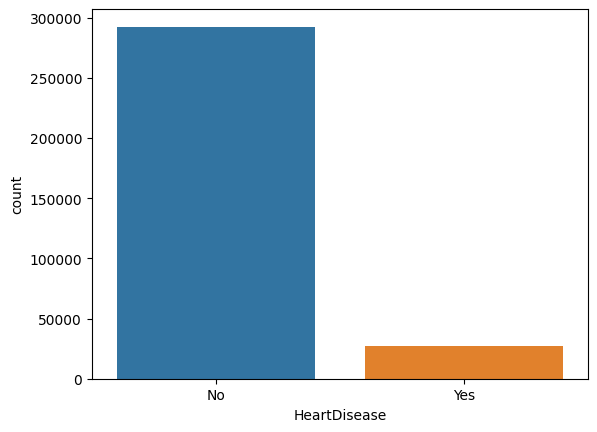

In [3]:
sns.countplot(x='HeartDisease', data=df)

<AxesSubplot:>

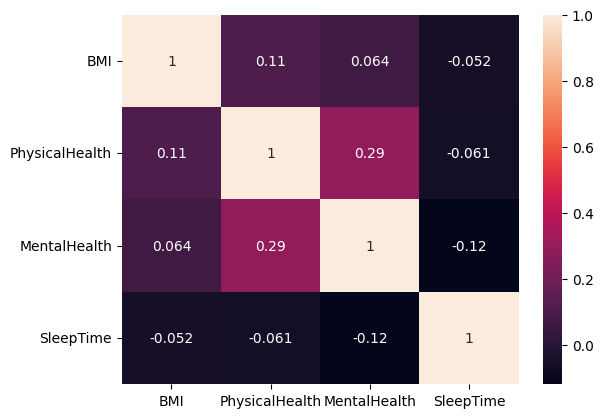

In [4]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

<AxesSubplot:>

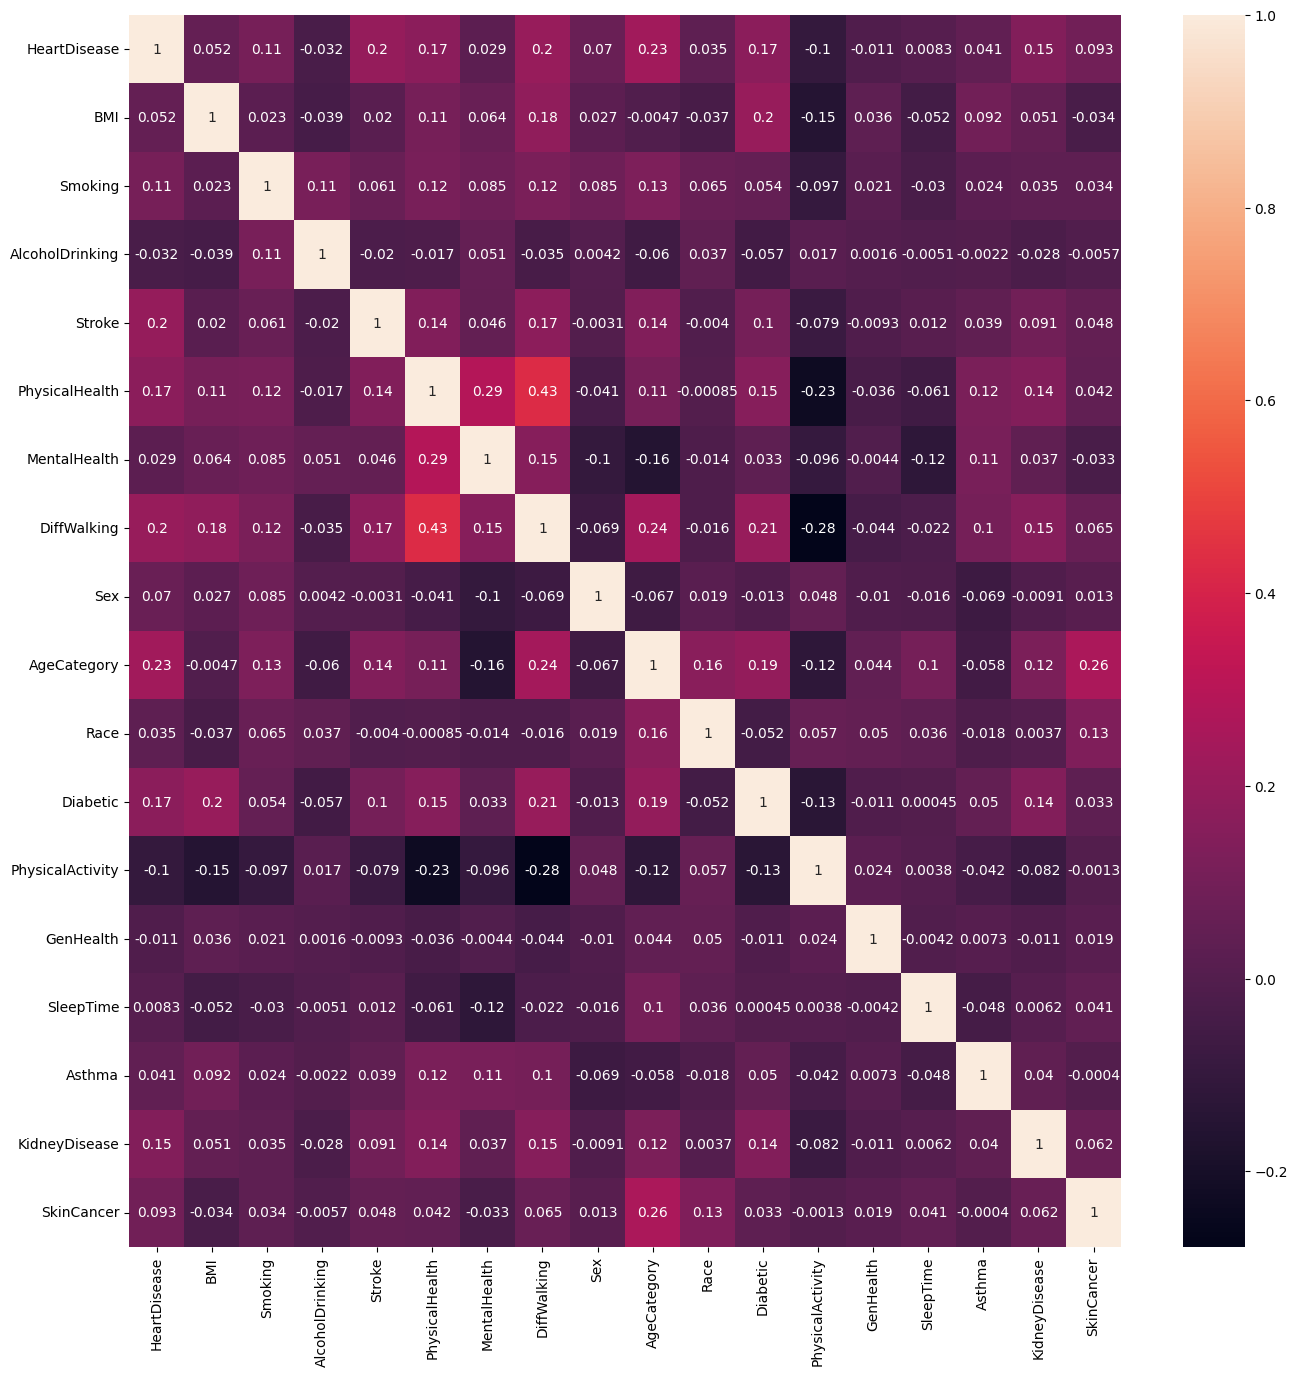

In [5]:
# Convert categorical labels to numeric using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Plot heatmap on the new dataset
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True)

### Training a preliminary model
Train an SVM classifier (with rbf kernel) on the columns Diabetic, Smoking, AlcoholDrinking and KidneyDisease. You can the first few ten thousand rows of the dataset to reduce your training time, and in the preliminary model we ignore the issue with nonrandom sampling for the time. Use the rest of the dataset as a test set. Report your test set accuracy and precision. Explain why calculating the accuracy is not enough.

In [6]:
# Split the dataset into train and test sets
X = df[['Diabetic', 'Smoking', 'AlcoholDrinking', 'KidneyDisease']][:10000]
y = df['HeartDisease'][:10000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train an SVM classifier
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Calculate accuracy and precision on the test set
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1798
           1       1.00      0.00      0.00       202

    accuracy                           0.90      2000
   macro avg       0.95      0.50      0.47      2000
weighted avg       0.91      0.90      0.85      2000



<font color="aqua">
<h3> Explanation </h3>

When evaluating the performance of an SVM classifier on imbalanced data, it's important to go beyond accuracy. Additional metrics like the confusion matrix, precision, recall, F1 score, AUC-ROC, and specificity provide a more comprehensive understanding of the classifier's performance. These metrics consider true positives, true negatives, false positives, and false negatives, allowing for a more nuanced evaluation of how well the classifier identifies positive and negative instances. By considering these metrics together, we can gain a deeper insight into the SVM classifier's effectiveness in handling imbalanced classes.

</font>

### Normalization-preliminary training continued
Normalize each numeric feature separately, and repeat the previous part for linear, rbf and polynomial kernels. What differences do you observe?

In [8]:
# Normalize numeric features separately
# numeric_features = df.select_dtypes(include='number').columns.drop('HeartDisease')
# df[numeric_features] = (df[numeric_features] - df[numeric_features].mean()) / df[numeric_features].std()
features = ['Diabetic', 'Smoking', 'AlcoholDrinking', 'KidneyDisease']
X = (df[features][:10000] - df[features].mean()) / df[features].std()
y = df['HeartDisease'][:10000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Repeat the SVM training and evaluation with different kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred, zero_division=1))

Kernel: linear
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1798
           1       1.00      0.00      0.00       202

    accuracy                           0.90      2000
   macro avg       0.95      0.50      0.47      2000
weighted avg       0.91      0.90      0.85      2000

Kernel: rbf
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1798
           1       1.00      0.00      0.00       202

    accuracy                           0.90      2000
   macro avg       0.95      0.50      0.47      2000
weighted avg       0.91      0.90      0.85      2000

Kernel: poly
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1798
           1       1.00      0.00      0.00       202

    accuracy                           0.90      2000
   macro avg       0.95      0.50      0.47      2000
weighted avg       0.91      0.90 

<font color="aqua">
It can be seen that the performance and assessment metrics for all of these kernels are the same. This may mean that the data are in such way the SVM with different kernels perform well enough
</font>

### Trying to get the best possible model
1: We consider the input data in two large categories: Categorical and numeric features. Split the dataset properly to a test and train set using train_test_split and extract the two aforementioned subsets from the dataset. <br>
2: Use a grid search to find the best hyperparameters for a random forest classifier on the categorical features. Your grid must also include the default parameters. Train the best classifier separately and calculate its accuracy, precision, f1 score, etc. (Hint: use 'classification_report'). <br>
3: Do the same for the entire feature set.  <br>
4: __(Bonus)__ Use another grid search (the grid needs not be very large) for an SVM model on the numeric features. To reduce the training time, you can use 'resample' to decrease the training set size. Use 'classification_report' on the test set. <br>
5: Use a SMOTE object to resample the training dataset and solve the data imbalance problem. Repeat parts 2 to 4. (Repeating part 4 also has a small bonus). <br>
6: __(Bonus)__ Try another model of your choice on the numeric features. Then, combine this model with yoour SVM and random forest on categorical features via max voting and compare it with the model in part 2.

In [10]:
df = pd.read_csv('heart_2020_cleaned.csv')[:1000]
X = df.drop('HeartDisease', axis=1)
encoder = LabelEncoder()
y = encoder.fit_transform(df['HeartDisease'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_test.select_dtypes(include='object')
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

In [11]:
# Step 2: Grid search for the best random forest classifier on categorical features
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv=5)

label_encoders = {}
for column in X_train_cat.columns:
    label_encoders[column] = LabelEncoder()
    X_train_cat[column] = label_encoders[column].fit_transform(X_train_cat[column])
    X_test_cat[column] = label_encoders[column].fit_transform(X_test_cat[column])

grid_search.fit(X_train_cat, y_train)

# Get the best classifier from the grid search
best_rfc = grid_search.best_estimator_

y_pred = best_rfc.predict(X_test_cat)
report = classification_report(y_test, y_pred, zero_division=1)
print(report)


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       171
           1       1.00      0.00      0.00        29

    accuracy                           0.85       200
   macro avg       0.93      0.50      0.46       200
weighted avg       0.88      0.85      0.79       200



In [12]:
# Grid search for the best random forest classifier on all features
label_encoders = {}
for column in X_train.columns:
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    X_test[column] = label_encoders[column].fit_transform(X_test[column])

grid_search.fit(X_train, y_train)
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       171
           1       1.00      0.00      0.00        29

    accuracy                           0.85       200
   macro avg       0.93      0.50      0.46       200
weighted avg       0.88      0.85      0.79       200



In [13]:
# Grid search for the best SVM model on numeric features
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_num, y_train)
grid_search.fit(X_train_resampled, y_train_resampled)
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_num)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       171
           1       0.10      0.21      0.14        29

    accuracy                           0.62       200
   macro avg       0.47      0.45      0.45       200
weighted avg       0.73      0.62      0.67       200



In [14]:
# Combining models via majority voting
from sklearn.ensemble import VotingClassifier

svm = SVC(kernel='rbf')
rfc = RandomForestClassifier()

voting_clf = VotingClassifier(estimators=[('svm', svm), ('rfc', rfc)], voting='hard')
voting_clf.fit(X_train_cat, y_train)
y_pred = voting_clf.predict(X_test_cat)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       171
           1       1.00      0.00      0.00        29

    accuracy                           0.85       200
   macro avg       0.93      0.50      0.46       200
weighted avg       0.88      0.85      0.79       200



<font color="aqua">
It can be seen vivdly that the performace metrics e.g. f1-score and accuracy have been enhanced by the method of majority voting for this case
</font>